In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import tqdm

plt.style.use('../ultrasurfaces_plotstyle.mplstyle')

from generator import Response
from generator import OscPars
from generator import Generator

### Plotting utility

In [2]:
def add_hist(fig, hist, label, **kwargs):
    # first and last bin are overflow bins in hist
    plt.stairs(hist['hist'][1:-1], hist['bin_edges'], label=label, **kwargs, lw=2.5)
    plt.stairs(
        hist['hist'][1:-1] + hist['hist_unc'][1:-1],
        hist['bin_edges'],
        baseline=hist['hist'][1:-1] - hist['hist_unc'][1:-1],
        fill=True,
        alpha=0.5,
        **kwargs
    )

### Set standard parameters

In [3]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = OscPars(delta_msq_31, sinsq_2theta_23)

default_response = Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

## Check event generation

### Just playing around with a couple of histograms

In [4]:
gen = Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [5]:
gen_2 = Generator(int(1e5), default_response, OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta))
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [6]:
gen_3 = Generator(int(1e5), Response(1.2 * default_response.mu, default_response.sigma), default_pars)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


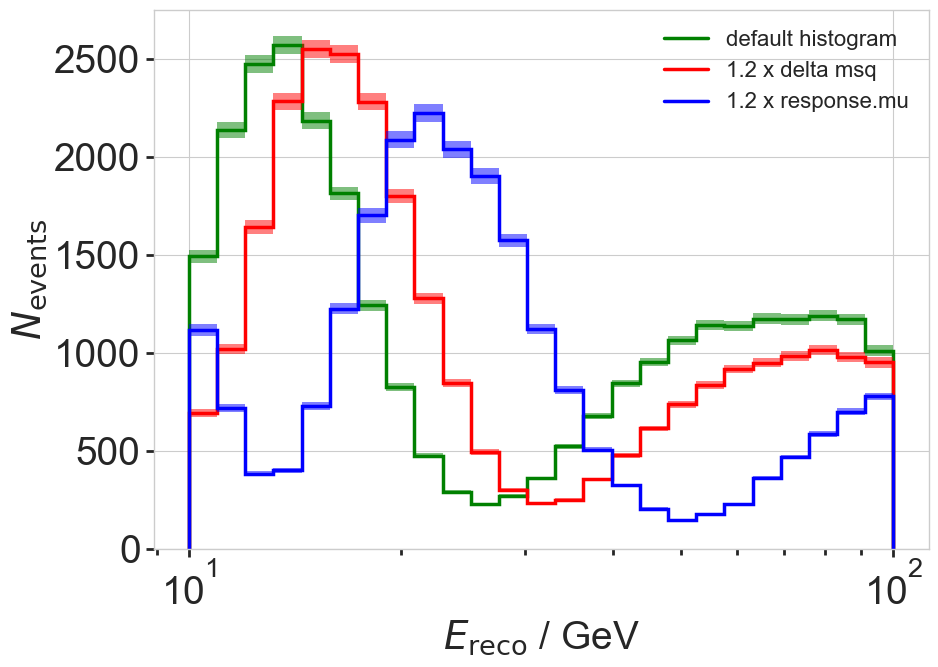

In [7]:
fig = plt.figure()

add_hist(fig, h0, 'default histogram', color='g')

add_hist(fig, h2, '1.2 x delta msq', color='r')

add_hist(fig, h3, '1.2 x response.mu', color='b')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

## Toy analysis

### Define systematic sets by their detector response, assuming the default oscillation parameters for now

In [8]:
default_response = Response(1., 0.05)
nevents = int(1e4)

In [9]:
variations = {
    'mu': {
        'baseline': 1.,
        'up': 1.05,
        'low': 0.95,
    }
}

responses = {
    "mu_baseline": Response(variations['mu']['baseline'] * default_response.mu, default_response.sigma),
    "mu_up": Response(variations['mu']['up'] * default_response.mu, default_response.sigma),
    "mu_low": Response(variations['mu']['low'] * default_response.mu, default_response.sigma),
}

# assume default oscillation parameters for now
sets = {k: Generator(nevents, r, default_pars) for k,r in responses.items()}


Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [10]:
variations

{'mu': {'baseline': 1.0, 'up': 1.05, 'low': 0.95}}

In [11]:
sets

{'mu_baseline': <generator.Generator at 0x13748d520>,
 'mu_up': <generator.Generator at 0x1040af0a0>,
 'mu_low': <generator.Generator at 0x1373fc400>}

### Use the discrete sets, so far only gradients in $\mu$ are calculated for testing

In [12]:
from toy_surfaces import ToyAnalysis_Hobo

In [13]:
analysis = ToyAnalysis_Hobo(sets, variations, bin_edges)

## Compare target histograms for generated set and gradient approximation:

### Default oscillation parameters

In [14]:
target_response = Response(1.05 * default_response.mu, default_response.sigma)
target_pars = OscPars(1. * default_pars.delta_mqs, default_pars.sinsq_2theta)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


NotImplementedError: WIP

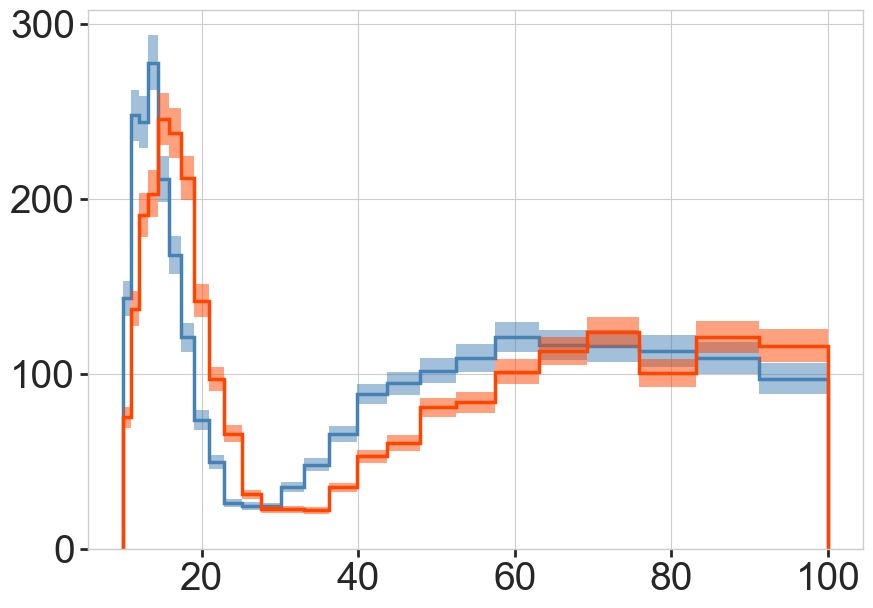

In [15]:
fig = plt.figure()

add_hist(fig, sets['mu_baseline'].get_histogram(bin_edges),
    'default histogram', color='steelblue')

add_hist(fig, Generator(nevents, target_response, target_pars).get_histogram(bin_edges),
    'target pars&response generated', color='orangered')

add_hist(fig, analysis.get_histogram(target_response, target_pars),
    'target pars reweighted &response gradients', color='forestgreen')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

### Non-default oscillation parameters: larger mass splitting

In [ ]:
target_response = Response(1.05 * default_response.mu, default_response.sigma)
target_pars = OscPars(1.3 * default_pars.delta_mqs, default_pars.sinsq_2theta)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


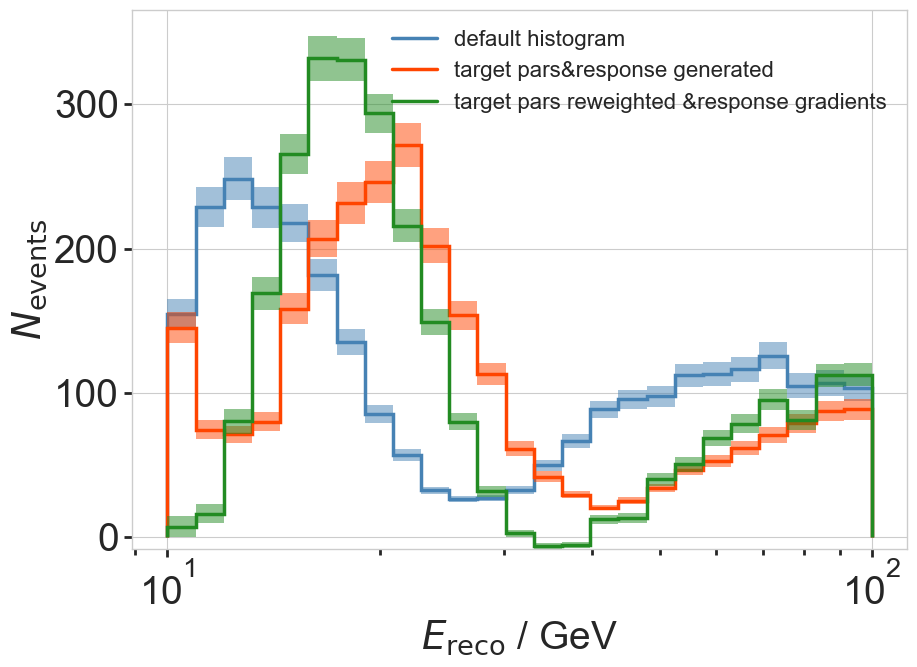

In [ ]:
fig = plt.figure()

add_hist(fig, sets['mu_baseline'].get_histogram(bin_edges),
    'default histogram', color='steelblue')

add_hist(fig, Generator(nevents, target_response, target_pars).get_histogram(bin_edges),
    'target pars&response generated', color='orangered')

add_hist(fig, analysis.get_histogram(target_response, target_pars),
    'target pars reweighted &response gradients', color='forestgreen')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

#### Set up dataset to train KNN

In [ ]:
sets

{'mu_baseline': <generator.Generator at 0x13757c1c0>,
 'mu_up': <generator.Generator at 0x120325e80>,
 'mu_low': <generator.Generator at 0x136e561f0>}

In [ ]:
from toy_surfaces import Toy_Analysis_USF

In [ ]:
usf = Toy_Analysis_USF(sets=sets)

In [ ]:
from generator import create_histogram

In [ ]:
X = usf.get_all_variables()
weights = usf.get_weights()

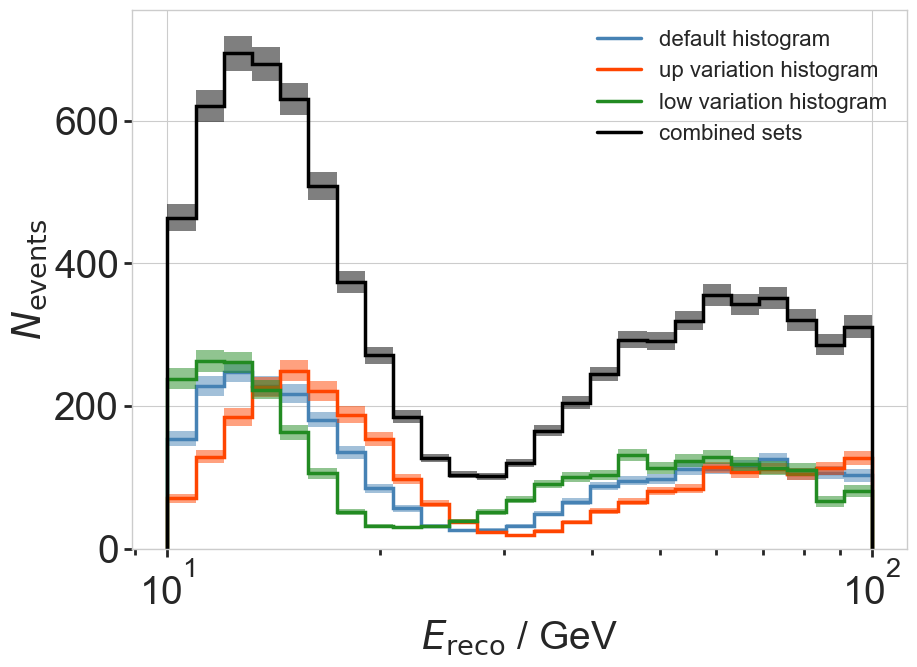

In [ ]:
# look at the full reco data

fig = plt.figure()

add_hist(fig, sets['mu_baseline'].get_histogram(bin_edges),
    'default histogram', color='steelblue')

add_hist(fig, sets['mu_up'].get_histogram(bin_edges),
    'up variation histogram', color='orangered')

add_hist(fig, sets['mu_low'].get_histogram(bin_edges),
    'low variation histogram', color='forestgreen')

add_hist(fig, create_histogram(X[:,1], weights, bin_edges),
    'combined sets', color='k')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

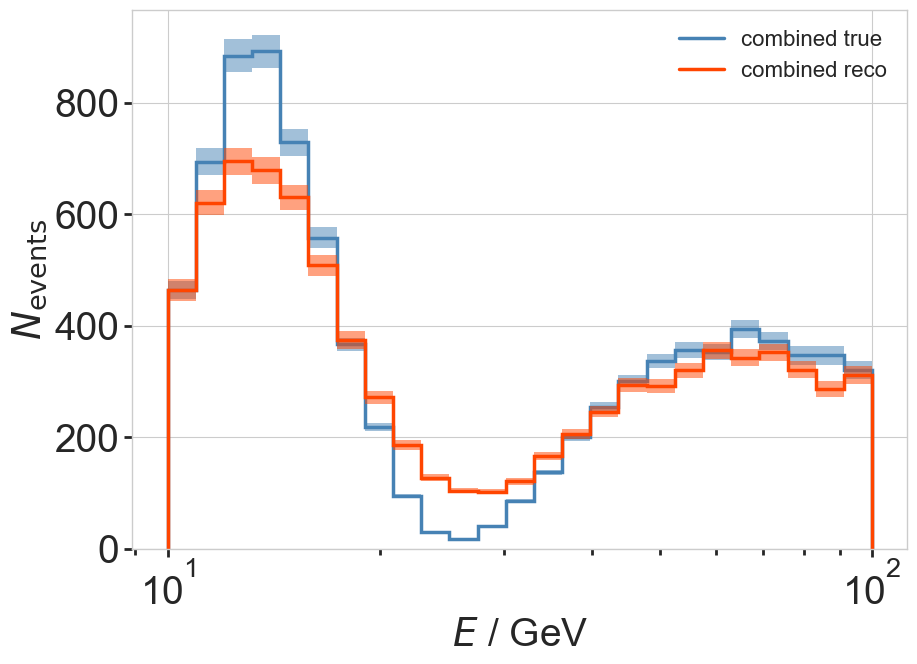

In [ ]:
# look at reco/true data (fed into the classifier)

fig = plt.figure()

add_hist(fig, create_histogram(X[:,0], weights, bin_edges),
    'combined true', color='steelblue')

add_hist(fig, create_histogram(X[:,1], weights, bin_edges),
    'combined reco', color='orangered')

plt.xscale('log')
plt.xlabel(r'$E$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

#### Set up the KNN

In [ ]:
X_transformed = usf.get_all_transformed_variables()

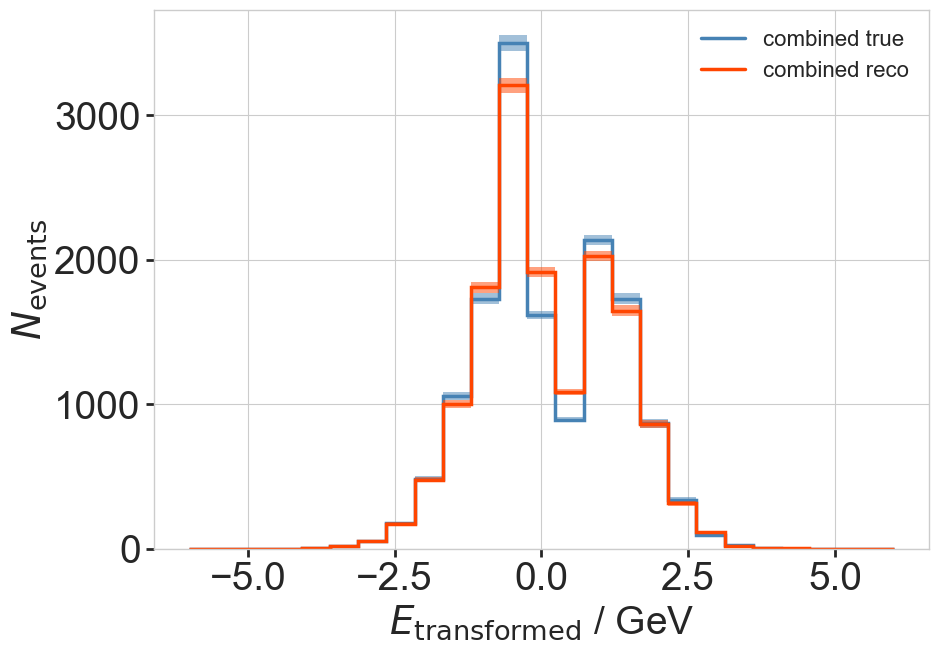

In [ ]:
# look at transformed reco/true data (fed into the classifier)

fig = plt.figure()

bin_edges_transformed = np.linspace(-6., 6., 26)

add_hist(fig, create_histogram(X_transformed[:,0], weights, bin_edges_transformed),
    'combined true', color='steelblue')

add_hist(fig, create_histogram(X_transformed[:,1], weights, bin_edges_transformed),
    'combined reco', color='orangered')

# plt.xscale('log')
plt.xlabel(r'$E_{\rm transformed}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

### Use predictions to re-weight nominal set

In [ ]:
nominal_set_probabilities = usf.get_nominal_set_probabilities()
weights_nom = usf.get_weights_nom()
X_nom = usf.get_variables_nom()

In [ ]:
# systematic set to be emulated
set_nr = 1

# calculate the denominator of the ratio
posterior_nominal = nominal_set_probabilities[:, 0]

# calculate the nominator
posterior_sys = nominal_set_probabilities[:, set_nr]

# adjust weights (but don't change the initial weights so we don't have to re-create the model)

weights_nom_KNN_rescaled = weights_nom * posterior_sys / posterior_nominal

In [ ]:
target_response = Response(1.05 * default_response.mu, default_response.sigma)  # use "up" variation
target_pars = OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta)

print(target_response)
print(target_pars)

Response(mu=1.05, sigma=0.05)
OscPars(delta_mqs=0.003018, sinsq_2theta=0.9831000000000002)


Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


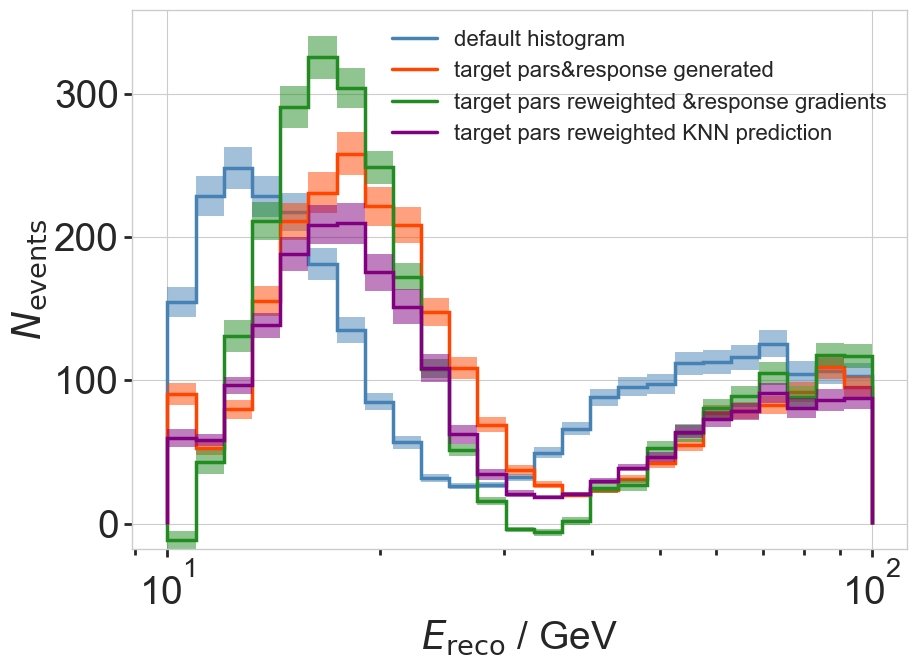

In [ ]:
fig = plt.figure()

add_hist(fig, sets['mu_baseline'].get_histogram(bin_edges),
    'default histogram', color='steelblue')

add_hist(fig, Generator(nevents, target_response, target_pars).get_histogram(bin_edges),
    'target pars&response generated', color='orangered')

add_hist(fig, analysis.get_histogram(target_response, target_pars),
    'target pars reweighted &response gradients', color='forestgreen')

add_hist(fig, create_histogram(X_nom[:,1], weights_nom_KNN_rescaled * sets['mu_baseline'].get_oscillation_reweight_factor(target_pars), bin_edges),
    'target pars reweighted KNN prediction', color='purple')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

### Calculating gradients for all events

In [ ]:

    # break

The following cells aren't adapted, just copied over from the KNN notebook...

### Now use interpolated predictions to re-weight nominal set to any systematic parameters

# systematic set to be emulated
set_nr = 4

set_mu = sys_sets[set_nr - 1]["scale"]
set_sig = sys_sets[set_nr - 1]["shape"]

sigma_nom = nominal_set["shape"]
mu_nom = nominal_set["scale"]

delta_mu = set_mu - mu_nom
delta_sig = set_sig - sigma_nom

features = poly.fit_transform(np.atleast_2d([delta_mu, delta_sig]))[0]

# mu_grad = nominal_set["model"].events["grad_scale"]
# sig_grad = nominal_set["model"].events["grad_shape"]

gradients = nominal_set["model"].events["gradients"]

weight_factor = 1. + np.dot(gradients, features)

# adjust weights (but don't change the initial weights so we don't have to re-create the model)
nominal_set["model"].events["weights"] = (
    nominal_set["model"].events["initial_weights"] * weight_factor
)

fig = Figure(figsize=(6, 4))
ax = fig.get_ax()

plot_hist(
    ax=ax, hist=sys_sets[set_nr - 1]["model"].get_template(),
    label=fr"$\mu = {sys_sets[set_nr - 1]['scale']}$, $\sigma={sys_sets[set_nr - 1]['shape']}$",
    color=None,
    errors="band"
)

# adjust weights (but don't change the initial weights so we don't have to re-create the model)
nominal_set["model"].events["weights"] = (
    nominal_set["model"].events["initial_weights"] * weight_factor
)

plot_hist(
    ax=ax,
    hist=nominal_set["model"].get_template(),
    label="nominal grad-weighted",
    errors="band",
    # color=None
)



plt.legend(ncol=2, fontsize=10)
ax.set_xlabel("reco energy (GeV)")
ax.set_ylabel("count")
ax.set_xscale("log")
plt.tight_layout()
# plt.savefig("grad_weighted_sys_set_mu_1.1_sig_0.3.pdf")

# compare with direct ML re-weighting
fig = Figure(figsize=(6, 4))
ax = fig.get_ax()

# calculate the denominator of the ratio
posterior_nominal = nominal_set_probabilities[:, 0]
# calculate the nominator
posterior_sys = nominal_set_probabilities[:, set_nr]
# adjust weights (but don't change the initial weights so we don't have to re-create the model)
nominal_set["model"].events["weights"] = (
    nominal_set["model"].events["initial_weights"] * posterior_sys / posterior_nominal
)
plot_hist(
    ax=ax,
    hist=nominal_set["model"].get_template(),
    label="nominal ML-weighted",
    errors="band",
    color=None
)

# adjust weights (but don't change the initial weights so we don't have to re-create the model)
nominal_set["model"].events["weights"] = (
    nominal_set["model"].events["initial_weights"] * weight_factor
)
plot_hist(
    ax=ax,
    hist=nominal_set["model"].get_template(),
    label="nominal grad-weighted",
    errors="band",
    # color=None
)


plt.legend(ncol=2, fontsize=10)
ax.set_xlabel("reco energy (GeV)")
ax.set_ylabel("count")
ax.set_xscale("log")